In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def print_full_rows(x):
    pd.set_option('display.max_rows', len(x))
    return x
    pd.reset_option('display.max_rows')
    
def print_full_columns(x):
    pd.set_option('display.max_columns', len(x.columns))
    return x
    pd.reset_option('display.max_rows')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Normal Model without Covid Restrictions

training_data = Entire 2019
<br> test_data = 2018 11~12, 2020 1~12

In [3]:
model_data = pd.read_csv('train_data_dayofweek.csv')

In [4]:
train_data = model_data.groupby(['Pickup Community Area', 'month', 'day', 'hour', 'dayofweek']).count().reset_index().rename({'Unnamed: 0':'Counts of Rides'}, axis = 1)
train_data['Counts of Rides'] = train_data['Counts of Rides'].apply(lambda x:np.log10(x+1))
train_data.head()

,Pickup Community Area,month,day,hour,dayofweek,Counts of Rides
0,1.0,1,1,0,1,2.411620
1,1.0,1,1,1,1,2.585461
2,1.0,1,1,2,1,2.660865
3,1.0,1,1,3,1,2.472756
4,1.0,1,1,4,1,2.287802


In [5]:
train_data['Counts of Rides'].describe()

count    650836.000000
mean          1.701330
std           0.603110
min           0.301030
25%           1.301030
50%           1.662758
75%           2.041393
max           3.851747
Name: Counts of Rides, dtype: float64

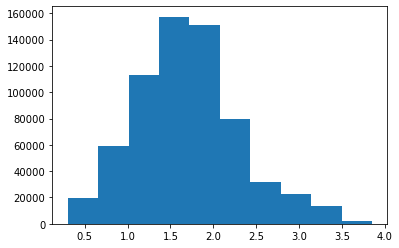

In [6]:
plt.hist(train_data['Counts of Rides'])
plt.show()

In [7]:
test = pd.read_csv('test_data_2018_dayofweek.csv')
test_data = test.groupby(['Pickup Community Area', 'month', 'day', 'hour', 'dayofweek']).count().reset_index().rename({'Unnamed: 0':'Counts of Rides'}, axis = 1)
test_data['Counts of Rides'] = test_data['Counts of Rides'].apply(lambda x:np.log10(x+1))


In [8]:
# test2 = pd.read_csv('test_data2020_0102.csv')
# test_data2 = test2.groupby(['Pickup Community Area', 'month', 'day', 'hour']).count().reset_index().rename({'Unnamed: 0':'Counts of Rides'}, axis = 1)
# test_data2['Counts of Rides'] = test_data2['Counts of Rides'].apply(lambda x:np.log10(x+1))
# X_test2, y_test2 = test_data2.drop('Counts of Rides', axis =1), test_data2['Counts of Rides']

In [9]:
test3 = pd.read_csv('train_data_2020_0304_dayofweek.csv')
test_data3 = test3.groupby(['Pickup Community Area', 'month', 'day', 'hour', 'dayofweek']).count().reset_index().rename({'Unnamed: 0':'Counts of Rides'}, axis = 1)
test_data3['Counts of Rides'] = test_data3['Counts of Rides'].apply(lambda x:np.log10(x+1))
X_test3, y_test3 = test_data3.drop('Counts of Rides', axis =1), test_data3['Counts of Rides']

In [10]:
X_train, y_train = train_data.drop('Counts of Rides', axis = 1), train_data['Counts of Rides']
X_test, y_test = test_data.drop('Counts of Rides', axis =1), test_data['Counts of Rides']

In [11]:
X_train

,Pickup Community Area,month,day,hour,dayofweek
0,1.0,1,1,0,1
1,1.0,1,1,1,1
2,1.0,1,1,2,1
3,1.0,1,1,3,1
4,1.0,1,1,4,1
...,...,...,...,...,...
650831,77.0,12,30,20,0
650832,77.0,12,30,21,0
650833,77.0,12,30,22,0
650834,77.0,12,30,23,0


# Random Forest

# 2018 Test data

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg =  RandomForestRegressor(max_depth = 12)
reg.fit(X_train_scaled, y_train)

train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

(train_score, test_score, mse, mae, r2_score)


(0.9530002986687863,
 0.9365299283762786,
 0.02331374376527857,
 0.10969535890976023,
 0.9365299283762786)

In [13]:
# import pickle
# filename = 'normal_model.sav'
# pickle.dump(reg, open(filename, 'wb'))

In [14]:
# filename2 = 'normal_scaler.sav'
# pickle.dump(scaler, open(filename2, 'wb'))

# 2020 Test Data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test2_scaled = scaler.transform(X_test2)

reg =  RandomForestRegressor(max_depth = 12)
reg.fit(X_train_scaled, y_train)

train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test2_scaled, y_test2)

y_pred = reg.predict(X_test2_scaled)
mse = mean_squared_error(y_test2, y_pred)
mae = mean_absolute_error(y_test2, y_pred)
r2_score = r2_score(y_test2, y_pred)

(train_score, test_score, mse, mae, r2_score)


(0.9246111848107053,
 0.9104604448171963,
 0.03204753772758481,
 0.13588711862407446,
 0.9104604448171963)

# Covid Restriction Test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test3_scaled = scaler.transform(X_test3)

reg =  RandomForestRegressor(max_depth = 12)
reg.fit(X_train_scaled, y_train)

train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test3_scaled, y_test3)

y_pred = reg.predict(X_test3_scaled)
mse = mean_squared_error(y_test3, y_pred)
mae = mean_absolute_error(y_test3, y_pred)
r2_score = r2_score(y_test3, y_pred)

(train_score, test_score, mse, mae, r2_score)


(0.9529932648713465,
 0.07705975140989318,
 0.25467008288840876,
 0.37857069597418475,
 0.07705975140989318)

# SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg =  SGDRegressor()
reg.fit(X_train_scaled, y_train)

train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

(train_score, test_score, mse, mae, r2_score)


(0.16186263729468664,
 0.1696082297966296,
 0.3050184198639222,
 0.426771806782147,
 0.1696082297966296)

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg =  DecisionTreeRegressor(max_depth=15)
reg.fit(X_train_scaled, y_train)

train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

(train_score, test_score, mse, mae, r2_score)


(0.9345964387945068,
 0.9089375767431431,
 0.03344893030910416,
 0.13324320397372452,
 0.9089375767431431)

# Logistic Regression

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = BayesianRidge()
reg.fit(X_train_scaled, y_train)

train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

(train_score, test_score, mse, mae, r2_score)

(0.16233620405133642,
 0.17150733623507808,
 0.30432084256872927,
 0.42599480186832067,
 0.17150733623507808)

# Adaboost regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = AdaBoostRegressor()
reg.fit(X_train_scaled, y_train)

train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

(train_score, test_score, mse, mae, r2_score)

(0.5498481168690615,
 0.5512208231159328,
 0.16484498078236637,
 0.3277620605402328,
 0.5512208231159328)

# Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = GradientBoostingRegressor()
reg.fit(X_train_scaled, y_train)

train_score = reg.score(X_train_scaled, y_train)
test_score = reg.score(X_test_scaled, y_test)

y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

(train_score, test_score, mse, mae, r2_score)

(0.8215376213520195,
 0.8119581476513872,
 0.06907128746906027,
 0.20261365324452474,
 0.8119581476513872)

# Covid Restriction Modeling

In [15]:
c_train_model = pd.read_csv('train_data_2020_0304_dayofweek.csv')
c_train_data = c_train_model.groupby(['Pickup Community Area', 'month', 'day', 'hour', 'dayofweek']).count().reset_index().rename({'Unnamed: 0':'Counts of Rides'}, axis = 1)
c_train_data['Counts of Rides'] = c_train_data['Counts of Rides'].apply(lambda x:np.log10(x+1))
c_X_train, c_y_train = c_train_data.drop('Counts of Rides', axis =1), c_train_data['Counts of Rides']

In [16]:
c_test_model = pd.read_csv('test_data_2020_05_dayofweek.csv')
c_test_data = c_test_model.groupby(['Pickup Community Area', 'month', 'day', 'hour', 'dayofweek']).count().reset_index().rename({'Unnamed: 0':'Counts of Rides'}, axis = 1)
c_test_data['Counts of Rides'] = c_test_data['Counts of Rides'].apply(lambda x:np.log10(x+1))
c_X_test, c_y_test = c_test_data.drop('Counts of Rides', axis =1), c_test_data['Counts of Rides']

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


scaler = StandardScaler()
c_X_train_scaled = scaler.fit_transform(c_X_train)
c_X_test_scaled = scaler.transform(c_X_test)

reg =  RandomForestRegressor(max_depth = 12)
reg.fit(c_X_train_scaled, c_y_train)

train_score = reg.score(c_X_train_scaled, c_y_train)
test_score = reg.score(c_X_test_scaled, c_y_test)

y_pred = reg.predict(c_X_test_scaled)
mse = mean_squared_error(c_y_test, y_pred)
mae = mean_absolute_error(c_y_test, y_pred)
r2_score = r2_score(c_y_test, y_pred)

(train_score, test_score, mse, mae, r2_score)


(0.9396784698777452,
 0.8813803724574166,
 0.023959862125243977,
 0.12237944743215064,
 0.8813803724574166)

In [18]:
# import pickle
# filename = 'covid_model.sav'
# pickle.dump(reg, open(filename, 'wb'))

In [19]:
# filename2 = 'covid_scaler.sav'
# pickle.dump(scaler, open(filename2, 'wb'))

# Grid Searching

In [43]:
# RandomForest GridSearch

from sklearn.model_selection import GridSearchCV

parameters = {
    "min_samples_split": [1, 2, 4],
    "min_samples_leaf":[1, 4],
    "max_depth":[3, 5, 10, 12, 15],
    "n_estimators":[100, 200, 300]
    }


reg = RandomForestRegressor()

grid_search = GridSearchCV(reg, param_grid = parameters, cv = 2, n_jobs=-1, verbose =10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

y_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
best_score = grid_search.best_score_
best_params = grid_search.best_params_

(mse, mae, r2_score, best_score, best_params)

Fitting 2 folds for each of 90 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 168 out of 180 | elapsed: 17.3min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 19.4min finished


TypeError: 'numpy.float64' object is not callable

In [44]:
y_pred = grid_search.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
#r2_score = r2_score(y_test, y_pred)
best_score = grid_search.best_score_
best_params = grid_search.best_params_

(mse, mae, best_score, best_params)

(0.18998591432182274,
 0.3425171420512428,
 -0.30463296911033483,
 {'max_depth': 3,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 100})